# Portfolio Project- Classic 911 Analysis

In [1]:
# Check for Data File
import os
print(os.listdir())

['.ipynb_checkpoints', '01.ipynb', '911.csv']


In [2]:
# Import all major libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Usage of inline Plotting
%matplotlib inline

In [4]:
# Load DataSet from CSV file 
data_frame = pd.read_csv('911.csv')

In [5]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289240 entries, 0 to 289239
Data columns (total 9 columns):
lat          289240 non-null float64
lng          289240 non-null float64
desc         289240 non-null object
zip          253942 non-null float64
title        289240 non-null object
timeStamp    289240 non-null object
twp          289137 non-null object
addr         289240 non-null object
e            289240 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 19.9+ MB


In [6]:
# Check head for our dataframe 
data_frame.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [7]:
# Check tail for our dataframe 
data_frame.tail()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
289235,40.024967,-75.282905,SCHUYLKILL EXPY & RAMP CITY AVE EB TO I76 WB; ...,NaN,EMS: VEHICLE ACCIDENT,2017-12-30 11:11:36,LOWER MERION,SCHUYLKILL EXPY & RAMP CITY AVE EB TO I76 WB,1
289236,40.024967,-75.282905,SCHUYLKILL EXPY & RAMP CITY AVE EB TO I76 WB; ...,NaN,Fire: VEHICLE ACCIDENT,2017-12-30 11:11:30,LOWER MERION,SCHUYLKILL EXPY & RAMP CITY AVE EB TO I76 WB,1
289237,40.107918,-75.163347,EDGE HILL RD & LIMEKILN PIKE; ABINGTON; 2017-1...,19038.0,Traffic: VEHICLE ACCIDENT -,2017-12-30 11:15:24,ABINGTON,EDGE HILL RD & LIMEKILN PIKE,1
289238,40.061922,-75.117655,COVENTRY AVE & NEW SECOND ST; CHELTENHAM; 2017...,19027.0,Traffic: DISABLED VEHICLE -,2017-12-30 11:12:03,CHELTENHAM,COVENTRY AVE & NEW SECOND ST,1
289239,40.098662,-75.352777,DEKALB PIKE & W BORO LINE RD; UPPER MERION; 20...,19406.0,Traffic: VEHICLE ACCIDENT -,2017-12-30 11:14:31,UPPER MERION,DEKALB PIKE & W BORO LINE RD,1


In [8]:
# Top5 ZipCodes
data_frame['zip'].value_counts().head(5)

19401.0    19821
19464.0    19276
19403.0    14524
19446.0    13939
19406.0     9601
Name: zip, dtype: int64

In [9]:
# Top5 Town
data_frame['twp'].value_counts().head(5)

LOWER MERION    24826
ABINGTON        17820
NORRISTOWN      16546
UPPER MERION    15288
CHELTENHAM      13359
Name: twp, dtype: int64

In [10]:
# Unique Reason to call 911
data_frame['title'].nunique()

131

In [11]:
# Top5 specific reason to Call 911
data_frame['SpecificReason'] = data_frame['title'].apply(lambda title: title.split(':')[1])

In [12]:
data_frame.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,SpecificReason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,DIZZINESS


In [13]:
data_frame['SpecificReason'].value_counts().head(6)

 VEHICLE ACCIDENT -       68123
 DISABLED VEHICLE -       20667
 VEHICLE ACCIDENT         16747
 FIRE ALARM               16359
 RESPIRATORY EMERGENCY    14637
 FALL VICTIM              14584
Name: SpecificReason, dtype: int64

In [14]:
# Top5 specific reason to Call 911
data_frame['BroadReason'] = data_frame['title'].apply(lambda title: title.split(':')[0])
data_frame.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,SpecificReason,BroadReason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,DIZZINESS,EMS


In [15]:
data_frame['BroadReason'].value_counts().head(6)

EMS        144362
Traffic    101889
Fire        42989
Name: BroadReason, dtype: int64

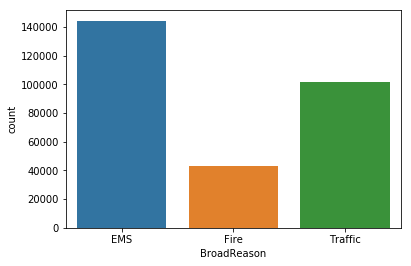

In [16]:
# PLoting a Countplot for BroadReason

sns.countplot(x='BroadReason', data=data_frame)

In [17]:
# Converting TimeStamp from object to Actuall TimeStamp in Pandas TimeStamp
data_frame['timeStamp'] = pd.to_datetime(data_frame['timeStamp'])

In [18]:
data_frame.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,SpecificReason,BroadReason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,DIZZINESS,EMS


In [19]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289240 entries, 0 to 289239
Data columns (total 11 columns):
lat               289240 non-null float64
lng               289240 non-null float64
desc              289240 non-null object
zip               253942 non-null float64
title             289240 non-null object
timeStamp         289240 non-null datetime64[ns]
twp               289137 non-null object
addr              289240 non-null object
e                 289240 non-null int64
SpecificReason    289240 non-null object
BroadReason       289240 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 24.3+ MB


In [20]:
type(data_frame['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [21]:
# Create 3 Columns for Hour, Months and day of week
data_frame['Hour'] = data_frame['timeStamp'].apply(lambda time: time.hour)
data_frame['Month'] = data_frame['timeStamp'].apply(lambda time: time.month)
data_frame['Day'] = data_frame['timeStamp'].apply(lambda time: time.dayofweek)

In [22]:
data_frame.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,SpecificReason,BroadReason,Hour,Month,Day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,DIZZINESS,EMS,16,12,3


In [23]:
data_frame['Hour'].nunique()

24

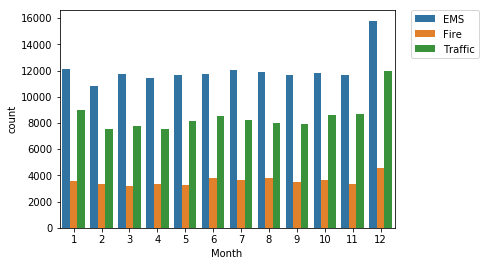

In [24]:
# Plot a Graph for a Month
sns.countplot(x='Month', data=data_frame, hue='BroadReason' )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # To plot legend Outside graph

In [25]:
# Use group_by
by_month = data_frame.groupby('Day').count()

In [26]:
by_month.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,SpecificReason,BroadReason,Hour,Month
Day,,,,,,,,,,,,,
0,42092,42092,42092,37030,42092,42092,42081,42092,42092,42092,42092,42092,42092
1,43744,43744,43744,38385,43744,43744,43731,43744,43744,43744,43744,43744,43744
2,43442,43442,43442,38327,43442,43442,43422,43442,43442,43442,43442,43442,43442
3,42784,42784,42784,37616,42784,42784,42770,42784,42784,42784,42784,42784,42784
4,44468,44468,44468,38923,44468,44468,44450,44468,44468,44468,44468,44468,44468


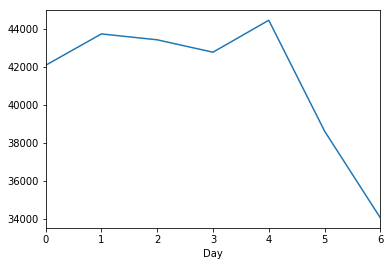

In [27]:
by_month['twp'].plot()